### k-최근접 이웃의 한계
- k- 최근 접이웃은 데이터 범위 내 값이 들어오면 예측력이 떨어진다는 단점이 있다.
 - 그 점을 보완하기 위해 사용하는 것이 선형회귀
- 새로운 데이터 예측력 낮음

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 
                         19.6, 20.0, 21.0,21.0, 21.0, 21.3, 22.0, 22.0, 
                         22.0, 22.0, 22.0, 22.5, 22.5, 22.7,23.0, 23.5, 
                         24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5,
                         27.5,27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                         36.5, 36.0, 37.0, 37.0,39.0, 39.0, 39.0, 40.0, 
                         40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0,
                         85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0,
                         120.0, 130.0, 135.0, 110.0, 130.0,150.0, 145.0,
                         150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0,
                         320.0, 514.0,556.0, 840.0, 685.0, 700.0, 700.0, 
                         690.0, 900.0, 650.0, 820.0,850.0, 900.0, 1015.0,
                         820.0, 1100.0, 1000.0, 1100.0, 1000.0,1000.0])

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state = 42)

In [8]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

##### k-최근접 이웃 회귀알고리즘

In [9]:
# k-최근접 이웃 회귀알고리즘(이웃수 = 3)
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)
# 학습
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [10]:
# 길이가 50cm인 생선 무게 예측
knr.predict([[50]]) # 2차원에 담음

array([1033.33333333])

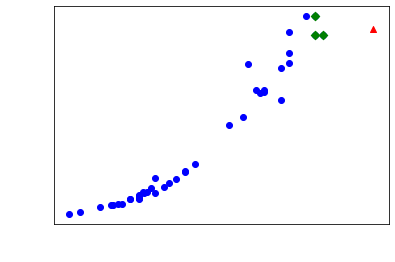

In [14]:
# 길이가 50cm인 생선의 주변 이웃들 
distances, indexs = knr.kneighbors([[50]])

# 시각화
plt.scatter(train_input, train_target, color = 'b')
plt.scatter(train_input[indexs], train_target[indexs], 
            marker='D', color ='g')
plt.scatter(50, 1033, marker ='^', color = 'r')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()
## 새로운 데이터의 예측력이 떨어진다.

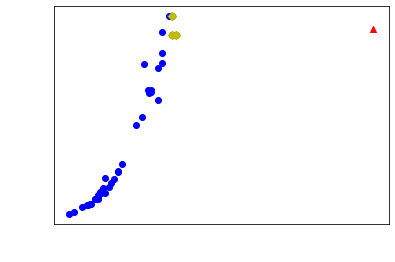

In [18]:
# 길이가 50cm인 생선의 주변 이웃들 
distances, indexs = knr.kneighbors([[100]])
# 시각화
plt.scatter(train_input, train_target, color = 'b')
plt.scatter(train_input[indexs], train_target[indexs], 
            marker='D', color ='y')
plt.scatter(100, 1033, marker ='^', color = 'r')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()
## 새로운 데이터의 예측력이 떨어진다.


### LinearRegression 알고리즘
- 선형회귀 분석

#### 단항 회귀

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #인스턴스 객체 생성

# 모델 학습
lr.fit(train_input, train_target)

LinearRegression()

In [20]:
# 50cm의 무게 예측
lr.predict([[50]])

array([1241.83860323])

In [ ]:
print(lr.coef_, lr.intercept_)  # 모델 파라미터
# 기울기, 상관계수, 가중치 / 절편

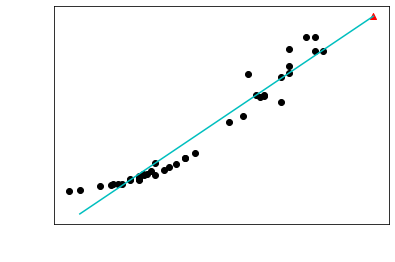

In [23]:
# 데이터
plt.scatter(train_input, train_target, color ='k')
# 길이는 15~50 정도 회귀선
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_],
        color = 'c')
# 예측 값
plt.scatter(50, 1241.8, marker ='^', color = 'r')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
## 회귀 선 안에 예측값이 있는걸 봐서는 예측력이 좋다는 것을 알수 있음.

In [24]:
# 과대 적합, 과소 적합을 알아보기 위한 결정계수
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


아래쪽으로 내려온다 생각할 떄 무게가 -값을 띌수 있고 데이터의 분포가 직선보단 곡선에 가깝기 때문에 최적의 직선보다 최선의 곡선(다항 회귀)를 찾아야 한다.

#### 다항 회귀
- w = a * x^2 * bx +c

In [25]:
# 2차 방정식 그래프를 그리기 위해 길이를 제곱한(input**2) 항을 추가하는 작업을 진행해야 한다.
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [26]:
train_poly.shape, test_poly.shape

((42, 2), (14, 2))

In [28]:
lr = LinearRegression() # instance
# 학습
lr.fit(train_poly, train_target)

LinearRegression()

In [29]:
# 예측
lr.predict([[50**2, 50]])

array([1573.98423528])

In [30]:
lr.coef_, lr.intercept_ # 기울기와 절편

(array([  1.01433211, -21.55792498]), 116.05021078278259)

- 무게 = 1.01 * 길이<sup>2</sup> + (-21.6) * 길이 + 116.05

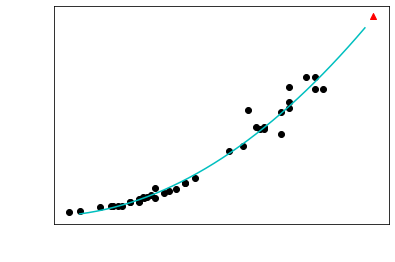

In [32]:
point = np.arange(15,50)
plt.scatter(train_input, train_target, color ='k')
# 길이는 15~50 정도 회귀선
plt.plot(point, 1.01*point**2 - 21.6*point +116.05,
        color = 'c')
# 예측 값
plt.scatter(50, 1574, marker ='^', color = 'r')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
## 회귀 선 안


In [33]:
# 결정계수
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
## 훈련셋과 테스트셋의 차이가 많이 줄어든것을 확인할 수 있다.
### test가 낮다는 것은 과소 적합이 의심될 수 있다.

0.9706807451768623
0.9775935108325121


### 다중회귀 (multiple regression)
- 여러개의 특성을 이용해서 선형회귀 알고리즘을 표현하는것
- 특성공학: 기존의 특성을 사용해 새로운 특성을 뽑아냄

In [34]:
df= pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv')

In [36]:
# 생선의 길이, 높이, 두께를 이용한 회귀분석
raw = df.to_numpy()
raw

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [37]:
# target data
weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [38]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
raw, weight, random_state=42)

##### 사이킷런 변환기 
- 타깃없이 입력데이터만 가지고 하는거...

In [39]:
# 다항식 변환기
from sklearn.preprocessing import PolynomialFeatures
## 현재 데이터를 다항식 형태로 변경하는 역할 수행

In [41]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

- 다중회귀 방정식
 - 무게 = a*길이 + b*높이 + c*두께 +1
 선형회귀 방정식의 절편과 ??? 1이라는것과 항상곱해주는 계수 (1*절편??)
 선형회귀 방정식의 절편은 값이 1인 특성과 곱해지는 계수

In [43]:
poly = PolynomialFeatures(include_bias = False) # 절편을 위한 항을 제거하는 
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

회귀 분석 시 모델만들어서 훈련할 때 
지도학습을 시키잖아(이때 문제랑 정답을 가지고 하지 input, target)
fit으로 모델을 만들고predict로 예측을 했잖아 

폴리변환기도 유사하게 fit과 transform이 있지만 여기는 input, target이 들어가는게
아니라input 값만 갖고 있다는거지, 타깃을 늘리는게 아니라 학습시킬 아이만 늘린다는 
거라서 타깃을 받을 필요없다 즉 같은 fit메서드 같지만 여기서는 input만 들어간대...

In [44]:
poly = PolynomialFeatures(include_bias = False) # 절편을 위한 항을 제거하는 
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape # 차원수가 9개로 증가한걸 알수 있음

(42, 9)

In [45]:
# 컬럼명 추출 (어떻게 그 값이 만들어졌는지 알수 있음)
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [46]:
# 학습용트레이닝 데이트 말고 평가용 만들기
test_poly=poly.transform(test_input)

### 다중 회귀 모델
- 학습시 특성공학으로 만들어진 데이터를 써야한다.
 - 선형회귀는 특성이 많아지면 능력이 뛰어나짐(결정력이 높아짐)

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [48]:
# 결정계수
lr.score(train_poly, train_target)

0.9903183436982125

In [49]:
lr.score(test_poly, test_target)

0.9714559911594155

In [50]:
## 아직 과소적합이 의심 될 수 있음
# 차수를 늘릴거(특성을 늘림)
poly = PolynomialFeatures(degree=5,include_bias = False)  
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [51]:
# 다시 학습
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target) # 계수 확인

0.9999999999938143

In [52]:
lr.score(test_poly, test_target)
# 특성도 적당히 늘려야함 , 특성의 개수가 늘리면 선형모델은 아주 강력해지지만,
# 너무 훈련세트에 과대 적합하게 돼서 좋지 않음 (과대적합 발생)- 특성 수를 줄임

-144.40744532797535

- 해당 사항을 방지하기 위해 모델을 늘리는것 말고도 규제를 통해 정확성을 늘릴수 있다...
- 훈련점수는 낮추고 테스트점수를 올리는거
- 피쳐 스케일링은 Z-VALUE?? ㅎ 모르겠다~~

### 규제 
- : 머신러닝 모델이 훈련세트를 너무 과도하게 학습하지 못하도록 규제하는것
 - 모델이 훈련세트에 과대적합하지 않도록 만드는 것
 - 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일이다.
- 릿지 회귀(Ridge Regression): 계수를 제곱한 값을 기준으로 규제를 적용시키는 모델
- 라쏘 회귀(Lasso Regression): 계수의 절대값을 기준으로 규제를 적용시키는 모델
 - 두알고리즘 모두 계수의 크기를 줄이지만, 라쏘는 아예 크기를 0으로 만들수 있기에 일반적으로 릿지를 더 선호 함.

 알파를 통해 규제하는 정도를 조정할수 있음
- alpha : 릿지와 라쏘모델을 사용할떄 규제의 양을 임의로 조절하는 하이퍼파라미터
 - alpha 大 -> 규제 강도가 세지므로 계수값을 더 줄이고 조금 더 과소적합이 되도록 유도
 - alpha 小 -> 계수를 줄이는 역할이 줄어들고 선형회귀모델과 유사해지므로 과대적합이될 가능성이 큼
-하이퍼파라미터(Hyperparameter): 머신러닝 모델이 학습할 수 없고, 사람이 알려줘야하는 파라미터

#### 스케일링
- 차원수가 올라가면서 3제곱, 4제곱... 등 수가 월등히 커지기 때문에 스케일링이 必

In [53]:
from sklearn.preprocessing import StandardScaler #스케일링 하는 객체

ss = StandardScaler() #인스턴스 생성
ss.fit(train_poly) # 특성공학으로 만든 데이터 학숩
train_scaled = ss.transform(train_poly) #학습 시킨것을 변환 
test_scaled = ss.transform(test_poly)

#### 릿지 회귀(Ridge Regression)

In [55]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target) # 규제 준 것을 학습
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [37]:
test_scaled.shape, test_target.shape

((127, 6), (127,))

In [57]:
print(ridge.score(test_scaled, test_target))

0.9790693977615386


In [27]:
# 훈련세트와 테스트세트의 점수가 가장 가까운 지점이 최적의 alpha값이 된다.
# 알파값을 바꿀때마다 score값을 저장해야함
## 값 저장을 위한 리스트 생성
train_score = []
test_score =[]

alpha_list = [0.001,0.01,0.1,1,10,100] 
# alpha값으로 쓸 값들의 리스트, 모든 값을 넣어볼 수 없으니제한하는거

for alpha in alpha_list:
    ridge= Ridge(alpha=alpha) # 릿지 모델
    ridge.fit(train_scaled, train_target) #릿지 학습
    train_score.append(ridge.score(train_scaled, train_target)) # R2 score(결정계수)
    test_score.append(ridge.score(test_scaled, test_target))

In [25]:
import matplotlib as mpl
mpl.rcParams['font.family'] ='batang'

In [26]:
# 시각화
plt.plot(np.log10(alpha_list), train_score, color='m')
plt.plot(np.log10(alpha_list), test_score, color='c')
plt.xlabel('alpha')
plt.ylabel('결정계수(R2)')
plt.show()
# 두 그래프가 가장 가까울때 alpha값이 최적임.

NameError: name 'alpha_list' is not defined

In [ ]:
- 적절한 알파값은 두 그래프가 가장 가깝고 테스트(시안)세트의 점수가 가장 높은 지점 -1, 10^-1=0.1
-3위치는 과대 적합, 2위치는 과소 적합을 향하는 지점

In [68]:
ridge= Ridge(alpha=0.1) 
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
# 최적의 모델 

0.9903815817570368
0.9827976465386896


##### 라쏘 회귀

In [65]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target) # 규제 준 것을 학습
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


In [69]:
train_score = []
test_score =[]

alpha_list = [0.001,0.01,0.1,1,10,100] 
# alpha값으로 쓸 값들의 리스트, 모든 값을 넣어볼 수 없으니제한하는거

for alpha in alpha_list:
    lasso= Lasso(alpha=alpha) # 릿지 모델
    lasso.fit(train_scaled, train_target) #릿지 학습
    train_score.append(lasso.score(train_scaled, train_target)) # R2 score(결정계수)
    test_score.append(lasso.score(test_scaled, test_target))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939724, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475362, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926335934, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


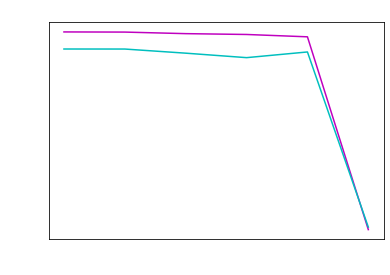

In [70]:
# 시각화
plt.plot(np.log10(alpha_list), train_score, color='m')
plt.plot(np.log10(alpha_list), test_score, color='c')
plt.xlabel('alpha')
plt.ylabel('결정계수(R2)')
plt.title('Lasso')
plt.show()
## 가장 적합한 알파는 10

In [71]:
lasso= Lasso(alpha=0.1) 
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
# 최적의 모델 

0.990137631128448
0.9819405116249365


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926335934, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


In [72]:
np.sum(lasso.coef_ == 0)

35

### 실습문제 : 보스턴 집값 예측

In [3]:
# 불러오기
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston) #집 값의 종속 변수랑 나머지 변수들

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [77]:
type(boston)

sklearn.utils.Bunch

In [4]:
# dataframe화
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
bostonDF['price'] = boston.target
bostonDF.shape

(506, 14)

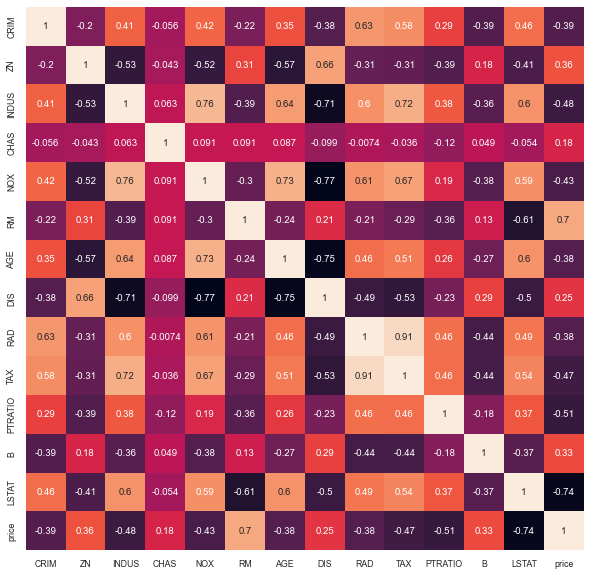

In [7]:
# 속성이 너무 많아서 특정 속성을 잡아주기위해 그래프 나타내기
import seaborn as sns
bostonDF_corr = bostonDF.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(bostonDF_corr, annot=True,cbar=False) # annot 차표위 글자
plt.show()

In [9]:
data = bostonDF[['TAX','RAD']]

In [10]:
data.shape

(506, 2)

In [28]:
from sklearn.model_selection import train_test_split
# 데이터셋 분리하기
train_input, test_input, train_target, test_target = train_test_split(
data, boston.target, random_state=42)

In [29]:
from sklearn.preprocessing import PolynomialFeatures
#1. 다항식 변환
Bpoly = PolynomialFeatures()
Bpoly.fit([[4, 285]])
Bpoly.transform([[4, 285]])

array([[1.0000e+00, 4.0000e+00, 2.8500e+02, 1.6000e+01, 1.1400e+03,
        8.1225e+04]])

In [30]:
train_poly=Bpoly.transform(train_input)

In [31]:
test_poly=Bpoly.transform(test_input)

In [32]:
from sklearn.linear_model import LinearRegression
#2. 다중 회귀 모델
Blr = LinearRegression()
Blr.fit(train_poly, train_target)
print(Blr.score(train_poly, train_target))
print(Blr.score(test_poly, test_target))

0.22460527416158205
0.2743945750617358


In [33]:
from sklearn.preprocessing import StandardScaler
#3. scaled
bss = StandardScaler()
bss.fit(train_poly)
train_scaled = bss.transform(train_poly)
test_scaled = bss.transform(test_poly)

In [34]:
from sklearn.linear_model import Ridge
#4. ridge
Bridge = Ridge() #instance
Bridge.fit(train_scaled, train_target)
print(Bridge.score(train_scaled, train_target))
print(Bridge.score(test_scaled, test_target))

0.21825062799257322
0.2743195787830809


In [35]:
#4-1. 알파값 찾기
Btrain_score = []
Btest_score = []
Balpha_list = [0.001,0.01,0.1,1,10,100] 

for alpha in Balpha_list:
    Bridge= Ridge(alpha=alpha) # 릿지 모델
    Bridge.fit(train_scaled, train_target) #릿지 학습
    Btrain_score.append(Bridge.score(train_scaled, train_target))
    Btest_score.append(Bridge.score(test_scaled, test_target))

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-

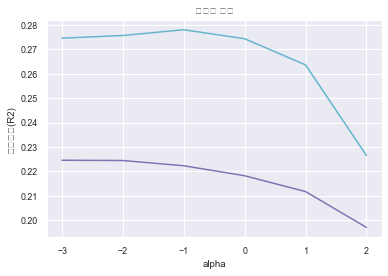

In [24]:
plt.plot(np.log10(Balpha_list), Btrain_score, color='m')
plt.plot(np.log10(Balpha_list), Btest_score, color='c')
plt.xlabel('alpha')
plt.ylabel('결정계수(R2)')
plt.title('보스턴 집값')
plt.show()

In [116]:
Bridge = Ridge(alpha=1) #instance
Bridge.fit(train_scaled, train_target)
print(Bridge.score(train_scaled, train_target))
print(Bridge.score(test_scaled, test_target))

0.23313044609890343
0.27724712547060815


In [117]:
Blasso = Lasso()
Blasso.fit(train_scaled, train_target)
print(Blasso.score(train_scaled, train_target))
print(Blasso.score(test_scaled, test_target))

0.21118774748127855
0.25538977376782734


In [118]:
Btrain_score = []
Btest_score = []
Balpha_list = [0.001,0.01,0.1,1,10,100] 

for alpha in Balpha_list:
    Blasso= Ridge(alpha=alpha) # 릿지 모델
    Blasso.fit(train_scaled, train_target) #릿지 학습
    Btrain_score.append(Blasso.score(train_scaled, train_target))
    Btest_score.append(Blasso.score(test_scaled, test_target))

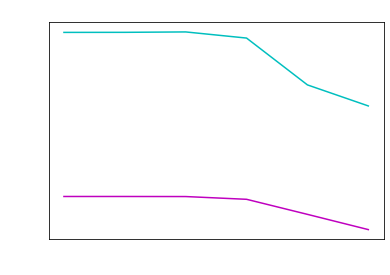

In [119]:
plt.plot(np.log10(Balpha_list), Btrain_score, color='m')
plt.plot(np.log10(Balpha_list), Btest_score, color='c')
plt.xlabel('alpha')
plt.ylabel('결정계수(R2)')
plt.title('Blasso')
plt.show()

##### 